This assignment covers data preprocessing with datasets contaning overlapping but different features. The goal is to augment, merge, and enhance the data while ensuring consistency in a machine learning pipeline.

TASK 1: Data Augmentation on CSV Files

In [1]:
# Loading the dataset
import pandas as pd

file_path = '../initial_dataset/customer_transactions.csv'

data = pd.read_csv(file_path)

In [2]:
data

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3
...,...,...,...,...,...,...
145,102,1146,88,2024-05-25,Sports,2.7
146,100,1147,387,2024-05-26,Books,4.6
147,104,1148,409,2024-05-27,Clothing,1.4
148,189,1149,178,2024-05-28,Sports,3.0


In [3]:
print(data.isnull().sum())

customer_id_legacy     0
transaction_id         0
purchase_amount        0
purchase_date          0
product_category       0
customer_rating       10
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer


# Handle missing values
# Numerical columns: Impute with mean (purchase_amount, customer_rating)
num_cols = ['purchase_amount', 'customer_rating']

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Categorical columns: Impute with mode (product_category)
cat_cols = ['product_category']
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [5]:
# Data Augmentation Strategies

import numpy as np

# Apply random noise to purchase_amount (±5%)
data['purchase_amount'] = data['purchase_amount'] * (1 + np.random.normal(0, 0.05, data.shape[0]))  # ±5% noise

# Apply log transformation to purchase_amount (log(1 + x))
data['purchase_amount'] = np.log1p(data['purchase_amount'])

# Expand data by generating synthetic transactions (slightly modify the existing ones)
synthetic_data = data.copy()

# Add slight variations to the purchase_amount and customer_rating for synthetic data
synthetic_data['purchase_amount'] *= np.random.uniform(0.9, 1.1, synthetic_data.shape[0])  # ±10% variation
synthetic_data['transaction_id'] = synthetic_data['transaction_id'].astype(str) + "_synth"  # Mark synthetic data

# Append the synthetic data to the original dataset
data = pd.concat([data, synthetic_data], ignore_index=True)

In [6]:
# Save the augmented dataset

print("\nExporting augmented dataset...")
data.to_csv('../augmented_dataset/customer_transactions_augmented.csv', index=False)
print("Augmented dataset saved as 'customer_transactions_augmented.csv'.")

augmented_data = pd.read_csv('../augmented_dataset/customer_transactions_augmented.csv')
print(augmented_data)


Exporting augmented dataset...
Augmented dataset saved as 'customer_transactions_augmented.csv'.
     customer_id_legacy transaction_id  purchase_amount purchase_date  \
0                   151           1001         6.000238    2024-01-01   
1                   192           1002         5.875819    2024-01-02   
2                   114           1003         6.093349    2024-01-03   
3                   171           1004         5.520724    2024-01-04   
4                   160           1005         4.107197    2024-01-05   
..                  ...            ...              ...           ...   
295                 102     1146_synth         4.371917    2024-05-25   
296                 100     1147_synth         5.559886    2024-05-26   
297                 104     1148_synth         6.390761    2024-05-27   
298                 189     1149_synth         5.043069    2024-05-28   
299                 113     1150_synth         5.818655    2024-05-29   

    product_category  cus

In [7]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
transactions_df = pd.read_csv("../augmented_dataset/customer_transactions_augmented.csv")
social_profiles_df = pd.read_csv("../initial_dataset/customer_social_profiles.csv")
id_mapping_df = pd.read_csv("../initial_dataset/id_mapping.csv")

In [9]:
transactions_df.columns
social_profiles_df.columns
id_mapping_df.columns

Index(['customer_id_legacy', 'customer_id_new'], dtype='object')

Perform a complex merge

In [10]:
# Step 2: Clean ID Mapping
id_mapping_df = id_mapping_df.drop_duplicates(subset=['customer_id_legacy'], keep='first')

In [11]:
# 1: Merge transactions with ID mapping
merged_df = transactions_df.merge(id_mapping_df, on="customer_id_legacy", how="left")

# 2: Merge with social media profiles
final_df = merged_df.merge(social_profiles_df, on="customer_id_new", how="left")

# Handle missing social profiles (customers without social media data)
final_df.fillna({
    "social_media_platform": "Unknown",
    "engagement_score": final_df["engagement_score"].median(),
    "purchase_interest_score": final_df["purchase_interest_score"].median(),
    "review_sentiment": "Neutral"
}, inplace=True)

In [12]:

final_df.head(10)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,6.000238,2024-01-01,Sports,2.3,A176,Facebook,70.0,3.3,Negative
1,192,1002,5.875819,2024-01-02,Electronics,4.2,A156,Instagram,52.0,4.9,Positive
2,114,1003,6.093349,2024-01-03,Electronics,2.1,A171,Unknown,78.0,3.6,Neutral
3,171,1004,5.520724,2024-01-04,Clothing,2.8,NaN,Unknown,78.0,3.6,Neutral
4,160,1005,4.107197,2024-01-05,Clothing,1.3,NaN,Unknown,78.0,3.6,Neutral
5,120,1006,5.977296,2024-01-06,Groceries,1.1,A159,Unknown,78.0,3.6,Neutral
6,182,1007,4.560564,2024-01-07,Sports,4.9,A193,TikTok,69.0,2.6,Negative
7,186,1008,6.086163,2024-01-08,Clothing,4.3,A160,TikTok,56.0,2.6,Positive
8,186,1008,6.086163,2024-01-08,Clothing,4.3,A160,LinkedIn,73.0,2.0,Neutral
9,186,1008,6.086163,2024-01-08,Clothing,4.3,A160,Instagram,89.0,2.9,Neutral


In [13]:

print(final_df.isnull().sum())

customer_id_legacy          0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating             0
customer_id_new            62
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
dtype: int64


In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_legacy       466 non-null    int64  
 1   transaction_id           466 non-null    object 
 2   purchase_amount          466 non-null    float64
 3   purchase_date            466 non-null    object 
 4   product_category         466 non-null    object 
 5   customer_rating          466 non-null    float64
 6   customer_id_new          404 non-null    object 
 7   social_media_platform    466 non-null    object 
 8   engagement_score         466 non-null    float64
 9   purchase_interest_score  466 non-null    float64
 10  review_sentiment         466 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 40.2+ KB


Feature Engineering & Tansformation

In [15]:
# Compute Customer Engagement Score
final_df["customer_engagement_score"] = (
    0.6 * final_df["engagement_score"] + 0.4 * final_df["purchase_interest_score"])

final_df["purchase_date"] = pd.to_datetime(final_df["purchase_date"])
# Compute Moving Average of Last 3 Transactions
final_df["moving_avg_purchase"] = final_df.groupby("customer_id_legacy")["purchase_amount"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Aggregate Monthly Spending
final_df["purchase_month"] = final_df["purchase_date"].dt.to_period("M")
monthly_spending = final_df.groupby(["customer_id_legacy", "purchase_month"])["purchase_amount"].agg(["sum", "mean"]).reset_index()
monthly_spending.rename(columns={"sum": "monthly_total_spend", "mean": "monthly_avg_spend"}, inplace=True)

# Merge Monthly Spending Data
final_df = final_df.merge(monthly_spending, on=["customer_id_legacy", "purchase_month"], how="left")

In [16]:
final_df = pd.get_dummies(final_df, columns=['product_category'])

In [17]:
vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(final_df['review_sentiment'].fillna(''))

In [18]:

print(final_df.duplicated().sum())  # Count duplicate rows
print(final_df.isnull().sum())
final_df.info()  # Count missing values

2
customer_id_legacy               0
transaction_id                   0
purchase_amount                  0
purchase_date                    0
customer_rating                  0
customer_id_new                 62
social_media_platform            0
engagement_score                 0
purchase_interest_score          0
review_sentiment                 0
customer_engagement_score        0
moving_avg_purchase              0
purchase_month                   0
monthly_total_spend              0
monthly_avg_spend                0
product_category_Books           0
product_category_Clothing        0
product_category_Electronics     0
product_category_Groceries       0
product_category_Sports          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id_legacy            466 non-null 

In [19]:
# Replace 'moving_avg_purchase' with the actual column if different
final_df = final_df.drop_duplicates()
final_df['avg_spent_last_3'] = final_df['moving_avg_purchase']  # Create the column
final_df['avg_spent_last_3'] = final_df['avg_spent_last_3'].fillna(final_df['avg_spent_last_3'].median())

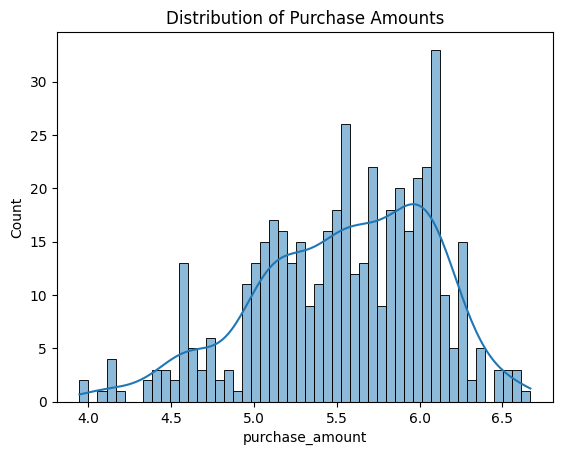

In [20]:

sns.histplot(final_df['purchase_amount'], bins=50, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.show()

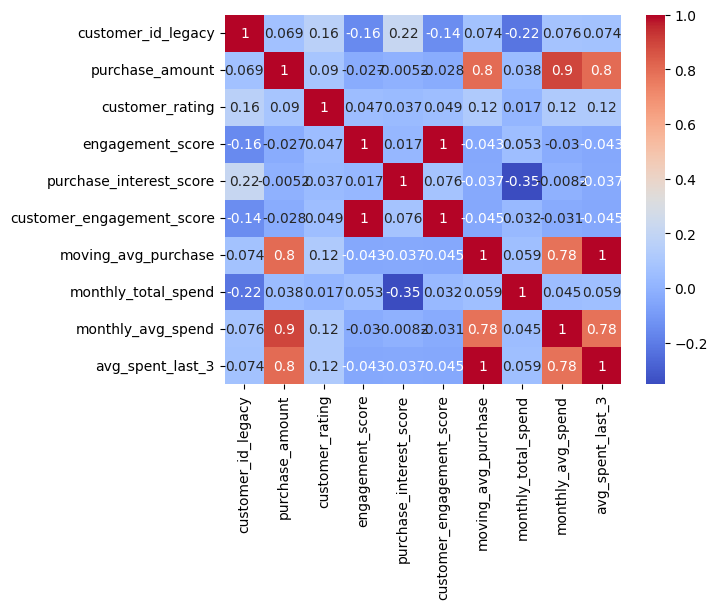

In [21]:
# Select only numeric columns for correlation
df_numeric = final_df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [22]:

final_df.to_csv("../final_dataset/final_customer_data_10.csv", index=False)

**Task 3**

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import skew

# Load the augmented dataset
final_data = pd.read_csv('../augmented_dataset/final_customer_data_10.csv')
print(final_data.shape)
final_data.head()

(464, 21)


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,...,moving_avg_purchase,purchase_month,monthly_total_spend,monthly_avg_spend,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Groceries,product_category_Sports,avg_spent_last_3
0,151,1001,5.955135,2024-01-01,2.3,A176,Facebook,70.0,3.3,Negative,...,5.955135,2024-01,12.074593,6.037297,False,False,False,False,True,5.955135
1,192,1002,5.770549,2024-01-02,4.2,A156,Instagram,52.0,4.9,Positive,...,5.770549,2024-01,12.064057,6.032029,False,False,True,False,False,5.770549
2,114,1003,6.088135,2024-01-03,2.1,A171,Unknown,78.0,3.6,Neutral,...,6.088135,2024-01,12.534216,6.267108,False,False,True,False,False,6.088135
3,171,1004,5.692522,2024-01-04,2.8,NaN,Unknown,78.0,3.6,Neutral,...,5.692522,2024-01,11.857024,5.928512,False,True,False,False,False,5.692522
4,160,1005,4.162725,2024-01-05,1.3,NaN,Unknown,78.0,3.6,Neutral,...,4.162725,2024-01,8.434288,4.217144,False,True,False,False,False,4.162725


In [24]:
# Data integrity checks

# Check for duplicate transaction ids
duplicate_transaction_ids = data['transaction_id'].duplicated().sum()
print(f"Duplicate transaction IDs: {duplicate_transaction_ids}")

if duplicate_transaction_ids > 0:
    data = data.drop_duplicates(subset=['transaction_id'])
    print(data.shape)

Duplicate transaction IDs: 0


In [25]:
# Ensure categorical values are correctly mapped
category_columns = data.select_dtypes(include=['object']).columns
for col in category_columns:
    print(f"Unique values in {col}: {data[col].unique()}")
    if data[col].isnull().sum() > 0:
        print(f"Missing values in {col}: {data[col].isnull().sum()}")

Unique values in transaction_id: [1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084
 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 '1001_synth'
 '1002_synth' '1003_synth' '1004_synth' '1005_synth' '1006_synth'
 '1007_synth' '1008_synth' '1009_synth' '1010_synth' '1011_synth'
 '1012_synth' '1013_synth' '1014_synth' '1015_synth' '1016_sy

In [26]:
# Validate customer transactions
invalid_ids = data['customer_id_legacy'].isnull().sum()
print(f"Invalid customer IDs: {invalid_ids}")

# Drop rows with missing customer IDs
if invalid_ids > 0:
    data = data.dropna(subset=['customer_id_legacy'])
    print(data.shape)

Invalid customer IDs: 0


       customer_id_legacy  purchase_amount  customer_rating
count          300.000000       300.000000       300.000000
mean           148.760000         5.522430         2.985000
std             29.996138         0.553012         1.163832
min            100.000000         3.946615         1.000000
25%            121.000000         5.168191         2.100000
50%            150.500000         5.580348         2.985000
75%            175.000000         5.948539         4.000000
max            199.000000         6.668165         5.000000


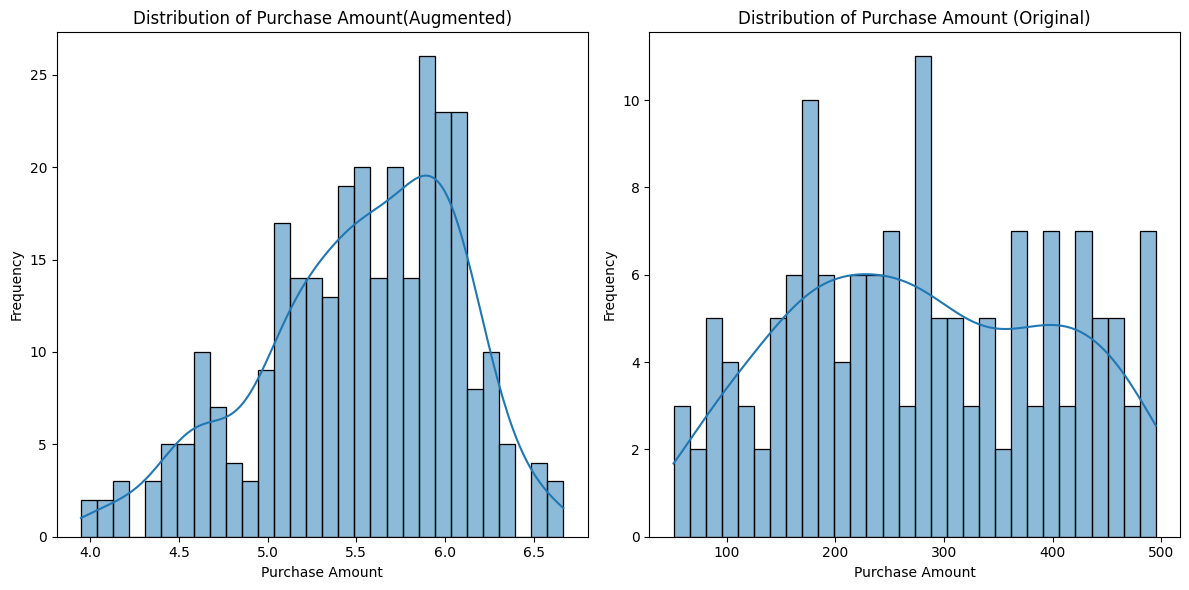

In [27]:
# Statistical summary
pd.set_option('display.max_columns', None)
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(data[numeric_cols].describe())

# Data visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['purchase_amount'], bins=30, kde=True)
plt.title("Distribution of Purchase Amount(Augmented)")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")

# original dataset
original_data = pd.read_csv('../initial_dataset/customer_transactions.csv')
plt.subplot(1, 2, 2)
sns.histplot(original_data['purchase_amount'], kde=True, bins=30)
plt.title("Distribution of Purchase Amount (Original)")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

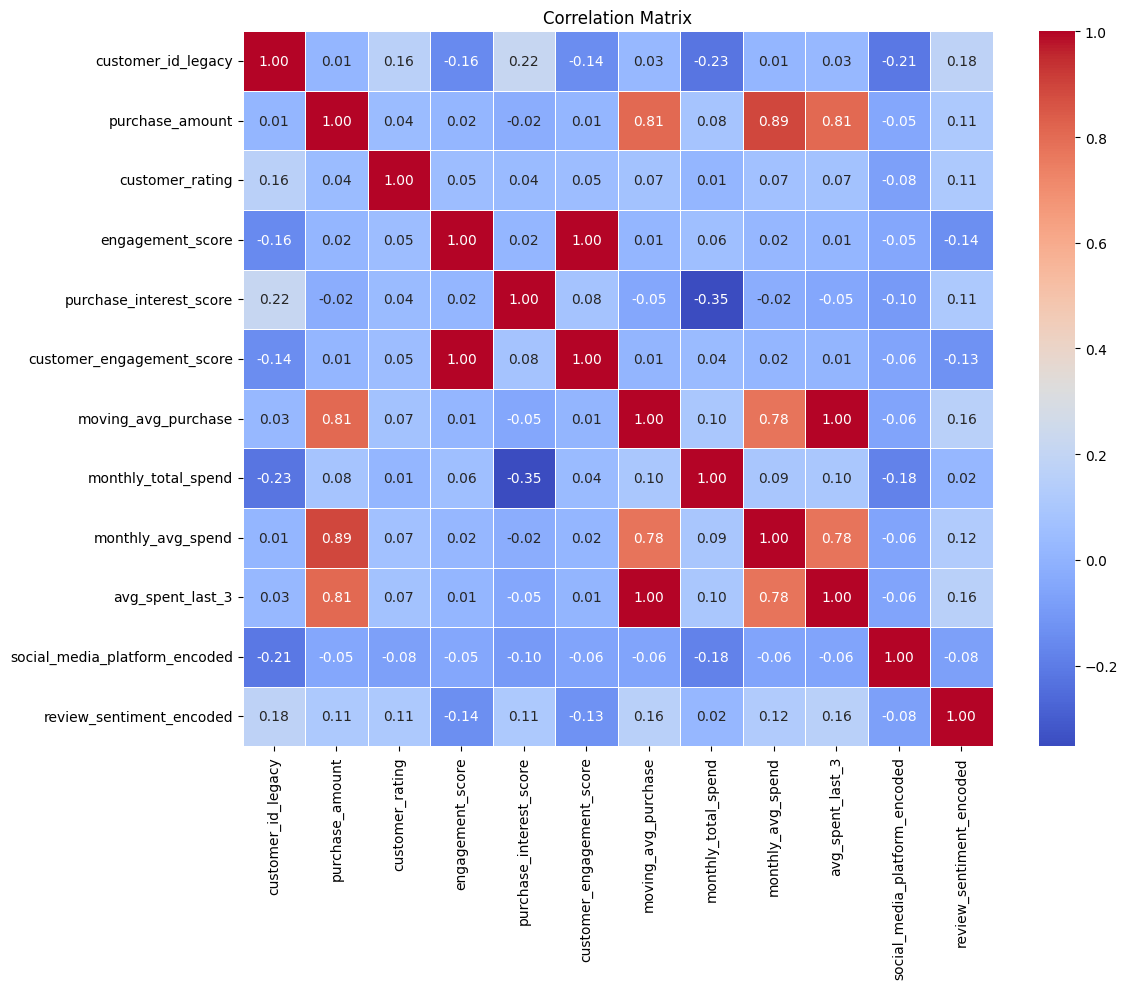

In [28]:
from sklearn.preprocessing import LabelEncoder

# Correlation heatmap
le_dict = {}
categorical_cols = ['social_media_platform', 'review_sentiment', 'product_category']
for col in categorical_cols:
    if col in final_data.columns:
        le = LabelEncoder()
        final_data[f'{col}_encoded'] = le.fit_transform(final_data[col].astype(str))
        le_dict[col] = le

numeric_cols = final_data.select_dtypes(include=['number']).columns
correlation_matrix = final_data[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [34]:
# Select top features using SelectKBest
X = final_data.drop(columns=['customer_id_legacy', 'transaction_id', 'purchase_amount'])
X = X.select_dtypes(include=[np.number])
y = final_data['purchase_amount']
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)
# Get feature scores and names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
top_features = feature_scores.nlargest(10, 'Score').sort_values(by='Score', ascending=True)
print("Top 10 most important features:")
print(top_features)

Top 10 most important features:
                         Feature        Score
3      customer_engagement_score     0.092233
1               engagement_score     0.109508
2        purchase_interest_score     0.198122
0                customer_rating     0.701016
8  social_media_platform_encoded     1.186247
5            monthly_total_spend     3.118614
9       review_sentiment_encoded     5.737890
4            moving_avg_purchase   862.354435
7               avg_spent_last_3   862.354435
6              monthly_avg_spend  1794.909279


In [36]:
# File export
output_file = '../final_dataset/final_dataset_ready_10.csv'
data.to_csv(output_file, index=False)

**BONUS MODEL**

In [38]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

input_file = '../final_dataset/final_dataset_ready_10.csv'
data = pd.read_csv(input_file)

# Split data into features and target
target = 'purchase_amount'
X = data.drop(columns=[target, 'customer_id_legacy', 'transaction_id'])

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    X = pd.get_dummies(X, columns=categorical_cols)

X = X.select_dtypes(include=[np.number])
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Encoding categorical columns: ['purchase_date', 'customer_id_new', 'social_media_platform', 'review_sentiment', 'purchase_month']
X_train shape: (371, 8), X_test shape: (93, 8)


In [39]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [41]:
import joblib

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

model_path = '../models/random_forest_model.pkl'
joblib.dump(model, model_path)

print(y_test_pred)

[5.97494273 6.08868017 5.16855583 5.45097843 5.17072178 6.57649392
 5.20612441 5.0816226  6.09965552 6.21382436 6.09849661 5.95330191
 6.14741753 5.33962414 5.22512856 5.8505537  6.36375548 4.56976077
 4.51351772 6.08810657 6.42405565 5.27740917 5.59876526 4.74056659
 5.35575493 5.7546354  5.48194473 5.75183483 5.32387785 5.99350687
 5.54972973 5.53200527 5.39536661 5.33286877 5.19532427 5.71409809
 5.54915564 4.57318562 5.35530946 5.99501285 5.0593896  4.61726702
 5.8999213  5.43617282 5.35995985 6.09778659 4.86284304 5.290156
 5.53879973 5.18506698 5.22890944 5.49598586 5.38748479 6.10755104
 5.30938456 4.67884999 6.106231   5.04856207 5.57083498 6.09600654
 5.64288028 5.88271589 6.07430856 5.03682414 6.11559343 5.49536377
 4.14792894 5.59604347 4.84098274 4.55226248 5.73112874 4.89074745
 5.86619877 5.48194473 6.02550861 6.09813162 5.85060416 6.28687708
 6.07762737 5.9585549  5.87064989 4.81736853 4.17022364 5.32427259
 6.1755891  5.89168596 6.14311206 5.77366998 5.39603138 4.974295

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training: RMSE={train_rmse:.2f}, R²={train_r2:.4f}")
print(f"Training: RMSE={test_rmse:.2f}, R²={test_r2:.4f}")

Training: RMSE=0.08, R²=0.9742
Training: RMSE=0.23, R²=0.8357
